# Examples of equilibrium reactions

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from math import exp
from scipy.constants import R

plt.rcParams["figure.figsize"] = (4, 3)

## Example 1: Temperature dependence of the equilibrium constant

For the reaction H₂(g) + ½S₂(g) ⇌ H₂S(g) we have measurements of $K(T)$ over a tempeature range specified in the `T` and `lnK` arrays in the code cell below. Since $\Delta_rG = \Delta_rH - T\Delta_rS = -RT\ln K$, we can obtain the reaction enthalpy and entropy by linear regression, assuming that these do not change in the given temperature interval:
$$
R\ln K = - \frac{\Delta_rH}{T} + \Delta_rS
$$
From this we can then estimate equilibrium constants for arbitrary temperatures, for example at 1000 K as illustrated below.

ΔᵣH = -88.8 kJ/mol
ΔᵣS = -47.9 J/K/mol
K(1000 K) = 136.4


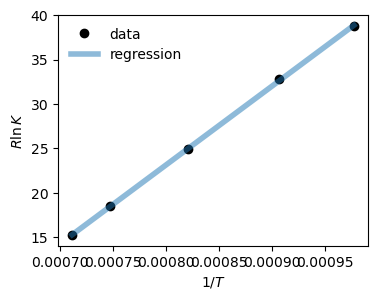

In [2]:
T = np.array([1023, 1103, 1218, 1338, 1405])  # Kelvin
lnK = np.array([4.66, 3.94, 3.00, 2.22, 1.83])  # ln(K)
dH, dS = np.polyfit(
    -1 / T, R * lnK, deg=1
)  # linear regression, returns highest power first
dG_1000 = dH - 1000 * dS  # ΔᵣG at 1000 K
print(f"ΔᵣH = {dH / 1000:.3} kJ/mol")
print(f"ΔᵣS = {dS:.3} J/K/mol")
print(f"K(1000 K) = {exp(-dG_1000/R/1000):.4}")

plt.plot(1 / T, R * lnK, "ko", label="data")
plt.plot(1 / T, -dH / T + dS, label="regression", lw=4, alpha=0.5)
plt.legend(loc=0, frameon=False)
plt.xlabel(r"$1/T$")
plt.ylabel(r"$R\ln K$")
plt.show()